# 차원 축소 - LLE (Locally Linear Embedding)

- 데이터 포인트를 근접한 이웃과 선형 결합으로 표현하고 이를 유지하도록 저차원 공간에 매핑

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.manifold import LocallyLinearEmbedding

iris_data = load_iris()

# LLE 변환
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
iris_lle = lle.fit_transform(iris_data.data)
# iris_lle.shape

iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1', 'lle_col2'])
iris_lle_df['target'] = iris_data.target

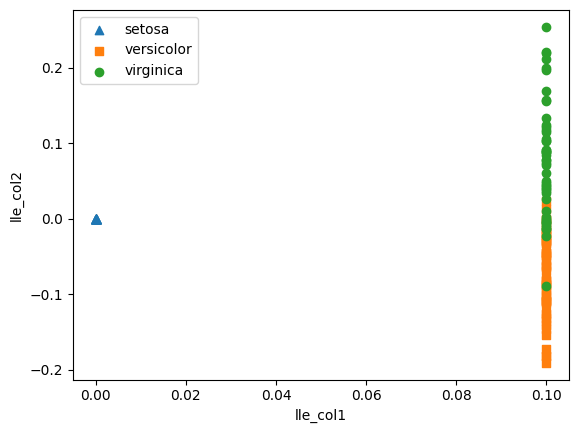

In [3]:
# 차원 축소 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, 
                iris_lle_df[['lle_col1', 'lle_col2']],
               iris_lle_df['target'], cv=3)
result

{'fit_time': array([0.00800395, 0.00800085, 0.00499606]),
 'score_time': array([0.00199652, 0.00300121, 0.00201964]),
 'test_score': array([0.94, 0.9 , 0.9 ])}

In [5]:
print(lle.n_neighbors)
print(lle.n_components)
print(lle.reconstruction_error_)

10
2
5.1168977786832e-07
